First, I will load the dataset:

In [1]:
#markdown headers for text, and simplify code with functions wherever its repetetive.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)




In the cells below I detect the problems with the data such as missing values and outliers. There are missing values and I have chosen replacing these missing values with means so that I can normalize some of those missing values without disturbing the data too much. 



In [2]:
lifeexpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [3]:
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.341530
Adult Mortality                     0.341530
infant deaths                       0.000000
Alcohol                             7.069971
percentage expenditure              0.000000
Hepatitis B                        23.186583
Measles                             0.000000
 BMI                                1.170799
under-five deaths                   0.000000
Polio                               0.650908
Total expenditure                   8.333333
Diphtheria                          0.650908
 HIV/AIDS                           0.000000
GDP                                17.991968
Population                         28.521435
 thinness  1-19 years               1.170799
 thinness 5-9 years                 1.170799
Income composition of resources     6.026705
Schooling                           5.873874
dtype: flo

In [4]:
lifeexpectancy_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [37]:

lifeexpectancy_df["Adult Mortality"].fillna(lifeexpectancy_df["Adult Mortality"].mean(), inplace=True)
lifeexpectancy_df["infant deaths"].fillna(lifeexpectancy_df["infant deaths"].mean(), inplace=True)
lifeexpectancy_df[" BMI "].fillna(lifeexpectancy_df[" BMI "].mean(), inplace=True)
lifeexpectancy_df["Polio"].fillna(lifeexpectancy_df["Polio"].mean(), inplace=True)
lifeexpectancy_df["Total expenditure"].fillna(lifeexpectancy_df["Total expenditure"].mean(), inplace=True)
lifeexpectancy_df["GDP"].fillna(lifeexpectancy_df["GDP"].mean(), inplace=True)
lifeexpectancy_df["Population"].fillna(lifeexpectancy_df["Population"].mean(), inplace=True)
lifeexpectancy_df["Income composition of resources"].fillna(lifeexpectancy_df["Income composition of resources"].mean(), inplace=True)
lifeexpectancy_df["Schooling"].fillna(lifeexpectancy_df["Schooling"].mean(), inplace=True)

In [1]:
lifeexpectancy_df["Adult Mortality", "infant deaths", " BMI ", "Polio", "Total expenditure", "GDP", "Population", "Income composition of resources", "Schooling"].fillna(lifeexpectancy_df["Adult Mortality", "infant deaths", " BMI ", "Polio", "Total expenditure", "GDP", "Population", "Income composition of resources", "Schooling"].mean(), inplace=True)


NameError: name 'lifeexpectancy_df' is not defined

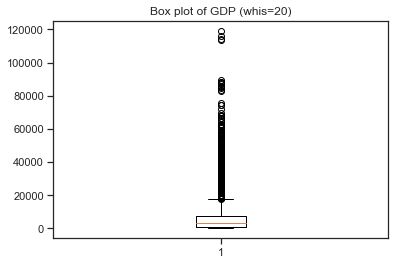

In [65]:
plt.boxplot(lifeexpectancy_df())
plt.title("Box plot of GDP (whis=20)")
plt.show()

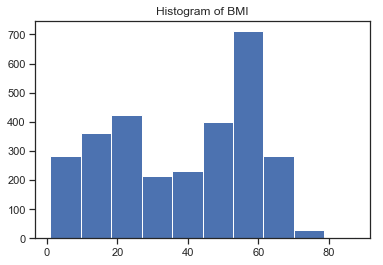

In [67]:
plt.hist(lifeexpectancy_df[" BMI "])
plt.title("Histogram of BMI")
plt.show()

Regarding the outliers, I use z scores below to see how many outliers there are. Then, I will winsorize the outliers so that they are minimized and stick with the most highly correlated variables in deducing my most impactful variables to life expectancy.

In [68]:


from scipy.stats import zscore
import numpy as np

z_scores = zscore(lifeexpectancy_df["Income composition of resources"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    

z_scores = zscore(lifeexpectancy_df["Schooling"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(lifeexpectancy_df["Adult Mortality"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(lifeexpectancy_df["Alcohol"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(lifeexpectancy_df["percentage expenditure"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(lifeexpectancy_df["Hepatitis B"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(lifeexpectancy_df["Measles"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
z_scores = zscore(lifeexpectancy_df[" BMI"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(lifeexpectancy_df["under-five deaths"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(lifeexpectancy_df["Polio"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(lifeexpectancy_df["GDP"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

z_scores = zscore(lifeexpectancy_df["Population"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
 


The score threshold is: 1
The indices of the outliers:
(array([ 113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,
        135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  241,
        242,  243,  244,  245,  246,  247,  248,  249,  250,  251,  252,
        253,  254,  255,  256,  369,  370,  371,  372,  373,  374,  375,
        376,  377,  378,  379,  496,  497,  498,  499,  500,  501,  502,
        503,  504,  505,  506,  507,  508,  509,  510,  511,  544,  545,
        673,  674,  675,  676,  677,  678,  679,  680,  681,  737,  738,
        739,  740,  741,  742,  743,  744,  745,  746,  747,  748,  749,
        750,  751,  752,  825,  867,  868,  869,  870,  871,  872,  873,
        874,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  

KeyError: 'Measles'

In [13]:

from scipy.stats.mstats import winsorize

winsorized_income_comp = winsorize(lifeexpectancy_df["Income composition of resources"], (0, 0.05))

winsorized_schooling = winsorize(lifeexpectancy_df["Schooling"], (0, 0.05))

winsorized_adult_mortality = winsorize(lifeexpectancy_df["Adult Mortality"], (0, 0.05))

In [ ]:
lifeexpectancy_df[].columns.mean(), inplace=True)


Here I am exploring the data using univariate and multivariate exploration techniques and I am paying special attention to your target variable. In this regard, my focus is on finding the relevant variables that may affect life expectancy.

I will use .describe() here for univariable analysis, as well as use histograms to visualize the data of each variable. I will also cross reference all variables and use .corr to see if there are any special relationships that are highly correlated. I will also include a heat map to better allow for visualizations 


In [38]:
lifeexpectancy_df.isnull().sum()*100/lifeexpectancy_df.isnull().count()

Country                                   0.000000
Year                                      0.000000
Status                                    0.000000
Life expectancy                           0.340368
Adult Mortality                           0.000000
infant deaths                             0.000000
Alcohol                                   0.000000
percentage expenditure                    0.000000
Hepatitis B                               0.000000
Measles                                   0.000000
 BMI                                      0.000000
under-five deaths                         0.000000
Polio                                     0.000000
Total expenditure                         0.000000
Diphtheria                                0.646698
 HIV/AIDS                                 0.000000
GDP                                       0.000000
Population                                0.000000
 thinness  1-19 years                     1.157250
 thinness 5-9 years            

In [46]:


lifeexpectancy_df.describe()



,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,filled_Income_composition_of_resources,filled_Schooling,filled_Adult Mortality,filled_Alcohol
count,2938.000000,2928.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2.938000e+03,2904.000000,2904.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.627551,11.992793,164.796448,4.602861
std,4.613841,9.523867,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,...,13136.800417,5.381546e+07,4.420195,4.508882,0.204820,3.264381,0.204820,3.264381,124.080302,3.916288
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,2004.000000,63.100000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,...,580.486996,4.189172e+05,1.600000,1.500000,0.504250,10.300000,0.504250,10.300000,74.000000,1.092500
50%,2008.000000,72.100000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,...,3116.561755,3.675929e+06,3.300000,3.300000,0.662000,12.100000,0.662000,12.100000,144.000000,4.160000
75%,2012.000000,75.700000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,7483.158469,1.275338e+07,7.200000,7.200000,0.772000,14.100000,0.772000,14.100000,227.000000,7.390000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,0.948000,20.700000,723.000000,17.870000


In [51]:
lifeexpectancy_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,filled_Income_composition_of_resources,filled_Schooling,filled_Adult Mortality,filled_Alcohol
Year,1.000000,0.170033,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,...,0.093351,0.014951,-0.047876,-0.050929,0.236333,0.203471,0.236333,0.203471,-0.078861,-0.048168
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.392403,0.381864,0.204622,-0.157586,0.562397,-0.222529,...,0.430562,-0.019638,-0.477183,-0.471584,0.692613,0.718640,0.692613,0.718640,-0.696359,0.392403
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,...,-0.277053,-0.012501,0.302501,0.308053,-0.440062,-0.435108,-0.440062,-0.435108,1.000000,-0.190408
infant deaths,-0.037415,-0.196557,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,...,-0.107109,0.548522,0.465711,0.471350,-0.143663,-0.191757,-0.143663,-0.191757,0.078747,-0.113812
Alcohol,-0.048168,0.392403,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,...,0.318591,-0.030765,-0.417874,-0.406784,0.416099,0.497546,0.416099,0.497546,-0.190408,1.000000
percentage expenditure,0.031400,0.381864,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,...,0.888140,-0.024648,-0.251369,-0.252905,0.380374,0.388105,0.380374,0.388105,-0.242814,0.339634
Hepatitis B,0.089398,0.204622,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,...,0.062318,-0.109811,-0.105600,-0.108804,0.150992,0.171755,0.150992,0.171755,-0.138591,0.075447
Measles,-0.082493,-0.157586,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,...,-0.068060,0.236250,0.224808,0.221072,-0.115764,-0.122609,-0.115764,-0.122609,0.031174,-0.051055
BMI,0.108327,0.562397,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,...,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105,0.479837,0.508105,-0.381449,0.318070
under-five deaths,-0.042937,-0.222529,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,...,-0.110640,0.535864,0.467789,0.472263,-0.161533,-0.207111,-0.161533,-0.207111,0.094135,-0.110777


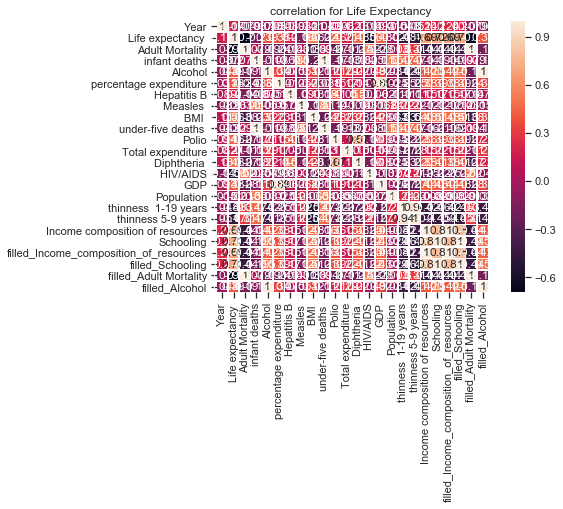

In [53]:
corrmat_lifeexpectancy_df = lifeexpectancy_df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_lifeexpectancy_df, square=True, annot=True, linewidths=.5)
plt.title("correlation for Life Expectancy ")

plt.show()

In the feature engineering step, I select a suite of variables that you think would be ideal in the modeling phase. More concretely, I am discarding some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Based on the correlations above, I see close relationships between 'Income composition of resources', 'Schooling', 'Adult Mortality', 'Diphtheria', 'HIV/AIDS', 'thinness', 'BMI', 'Polio' and 'GDP' as the key variables impacting 'Life Expectancy'. 

I would like to look at non-obvious contributors to life expectancy so for this reason I will be removing Adult Mortality, diseases and illnesses included in this set and I will instead focus on the remaining core variables as my 'features':  

'Income composition of resources',
'Schooling',
'BMI',
'GDP' 


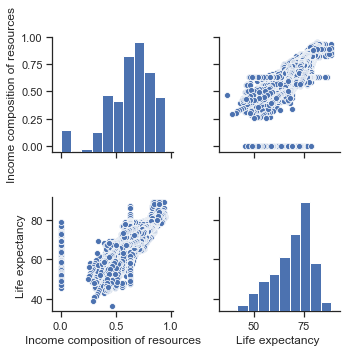

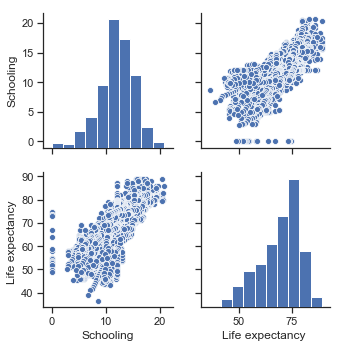

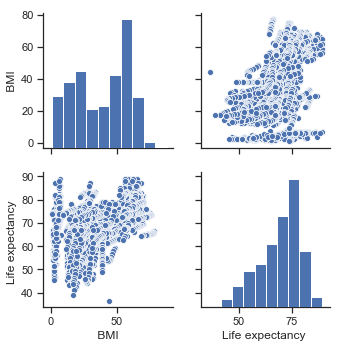

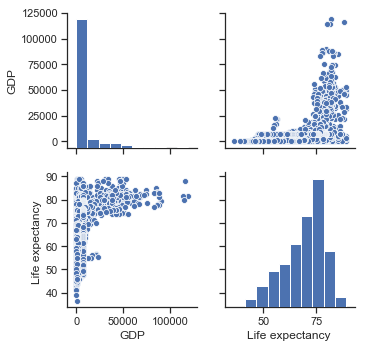

In [63]:
import seaborn as sns
sns.set(style="ticks") 
sns.pairplot(lifeexpectancy_df[['Income composition of resources', 'Life expectancy ']])
sns.pairplot(lifeexpectancy_df[['Schooling', 'Life expectancy ']])
sns.pairplot(lifeexpectancy_df[[' BMI ', 'Life expectancy ']])
sns.pairplot(lifeexpectancy_df[['GDP', 'Life expectancy ']])

Summary of findings: 
    
I had a longer list of variables when looking at what impacted life expectancy the most. While some were somewhat obvious, like Polio, HIV/AIDS and of course, adult mortality, I wanted to focus on the not so obvious because I think this would be particularly telling and valuable information. 

When accounting for health related causes, it then appears that Schooling, GDP, BMI and Income composition of resources had the highest impact on life expectancy. From a quality of life perspective, this tells us that those more financially well off, those in countries with higher GDP, and those with better schooling and healthier BMIs can look forward to longer life spans. 

I've created a few pair plots below to illustrate the relationship between these specific four variables. 


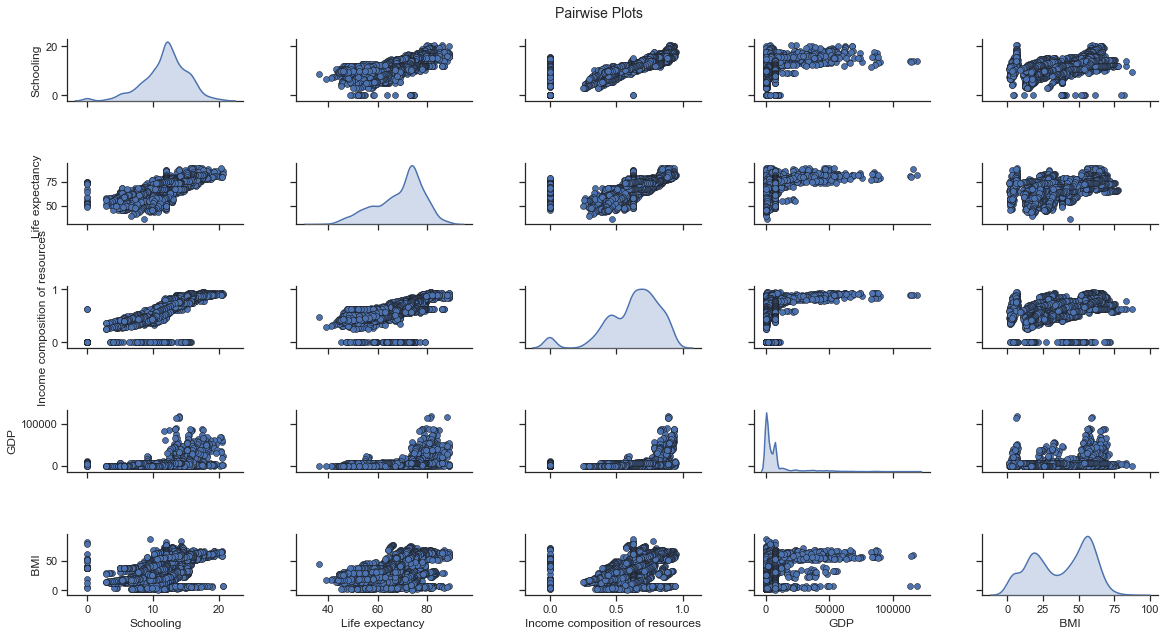

In [64]:



cols = ['Schooling', 'Life expectancy ', 'Income composition of resources', 'GDP', ' BMI ' ]
pp = sns.pairplot(lifeexpectancy_df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=14)